<a href="https://colab.research.google.com/github/Vusumuzi2Mabasa/BioHack2022/blob/main/PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UPLOADING DATASET(AID 492950) OBTAINED FROM PUBCHEM DATABASE
The dataset was curated manually in excel. 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving DNA_methylation.xlsx to DNA_methylation.xlsx


#READING THE EXCEL FILE CONTAINING CANONICAL SMILES in Python

The simplified molecular-input line-entry system (SMILES) is a specification used to translate a chemical's three-dimensional structure into a string of symbols that can be easily used for machine learning purposes.


In [17]:
import pandas as pd

df2 = pd.read_excel('DNA_methylation.xlsx')
df2

,PUBCHEM_CID,SMILES,Class
0,135521476,COC1=CC=CC(=C1O)/C=N/NC(=O)C2=C3CCC4=CC=CC=C4C...,Inactive
1,1328767,C1=CC(=CC=C1C2=CC=C(O2)C(=O)NC(=S)NC3=CC=C(C=C...,Active
2,9594974,CC1=CC(=C2C=C(C=CC2=N1)OC)N/N=C/C3=CC=C(C=C3)F,Active
3,24761597,CC1=C[N+](=C(C=C1)/C=C/C2=CC=C(C=C2)N(C)C)C.[I-],Active
4,135521417,CC1=C(SN=N1)C(=O)N/N=C/C2=C(C3=CC=CC=C3C=C2)O,Inactive
...,...,...,...
536,2012947,C1=CC=C2C(=C1)N=C(S2)C3=CC=C(O3)/C=C\4/C(=O)N(...,Inactive
537,875407,CN1C2=C(C3=CC=CC=C3C4=CC=CC=C42)N=C1C5=CC=C(S5...,Inactive
538,2443542,CCC(=O)NC1=CC=C(C=C1)C(=O)COC(=O)C2=NN3C(=CC=N...,Inactive
539,5735947,CC1=C(C=C(C=C1)C(=O)O)C2=CC=C(O2)/C=C/3\C(=O)N...,Inactive


#EXPLORATORY DATA ANALYSIS & DATA PRE-PROCESSING

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.pyplot as pp
import pandas.plotting


Text(0.5, 1.0, 'TB cytotoxicity')

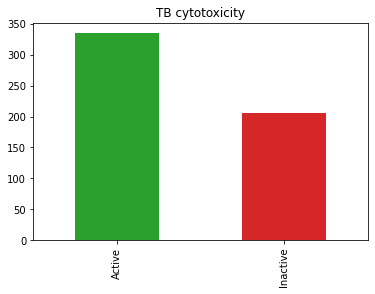

In [19]:
df2.Class.value_counts().plot(kind="bar", color=["C2","C3"]); pp.title("TB cytotoxicity")

In [20]:
df_class = df2.drop(columns='PUBCHEM_CID')
df_class

,SMILES,Class
0,COC1=CC=CC(=C1O)/C=N/NC(=O)C2=C3CCC4=CC=CC=C4C...,Inactive
1,C1=CC(=CC=C1C2=CC=C(O2)C(=O)NC(=S)NC3=CC=C(C=C...,Active
2,CC1=CC(=C2C=C(C=CC2=N1)OC)N/N=C/C3=CC=C(C=C3)F,Active
3,CC1=C[N+](=C(C=C1)/C=C/C2=CC=C(C=C2)N(C)C)C.[I-],Active
4,CC1=C(SN=N1)C(=O)N/N=C/C2=C(C3=CC=CC=C3C=C2)O,Inactive
...,...,...
536,C1=CC=C2C(=C1)N=C(S2)C3=CC=C(O3)/C=C\4/C(=O)N(...,Inactive
537,CN1C2=C(C3=CC=CC=C3C4=CC=CC=C42)N=C1C5=CC=C(S5...,Inactive
538,CCC(=O)NC1=CC=C(C=C1)C(=O)COC(=O)C2=NN3C(=CC=N...,Inactive
539,CC1=C(C=C(C=C1)C(=O)O)C2=CC=C(O2)/C=C/3\C(=O)N...,Inactive


In [21]:
df_class1 = df_class.drop(columns= 'SMILES')
df_class1

,Class
0,Inactive
1,Active
2,Active
3,Active
4,Inactive
...,...
536,Inactive
537,Inactive
538,Inactive
539,Inactive


#PaDELPy LIBRARY INSTALLATION
*PaDELpy is an open-source library that provides a Python wrapper for the PaDEL-descriptor calculation software*

In [4]:
! pip install padelpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.5 MB/s 


In [5]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2022-09-23 17:53:03--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2022-09-23 17:53:03--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2022-09-23 17:53:03 (85.3 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xm

#CREATING A FINGERPRINT LIST FROM PaDELpy

In [6]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [7]:
FP_list = ['AtomPairs2DCount',
           'AtomPairs2D',
           'EState',
           'CDKextended',
           'CDK',
           'CDKgraphonly',
           'KlekotaRothCount',
           'KlekotaRoth',
           'MACC',
           'Pubchem',
           'SubstructureCount',
           'Substructure']

In [8]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACC': 'MACCSFingerprinter.xml',
 'Pubchem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [9]:
selection = ['SMILES','Class']
df3_selection = df2[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)


In [10]:
! cat molecule.smi | head -5

COC1=CC=CC(=C1O)/C=N/NC(=O)C2=C3CCC4=CC=CC=C4C3=NN2	Inactive
C1=CC(=CC=C1C2=CC=C(O2)C(=O)NC(=S)NC3=CC=C(C=C3)C(=O)O)Br	Active
CC1=CC(=C2C=C(C=CC2=N1)OC)N/N=C/C3=CC=C(C=C3)F	Active
CC1=C[N+](=C(C=C1)/C=C/C2=CC=C(C=C2)N(C)C)C.[I-]	Active
CC1=C(SN=N1)C(=O)N/N=C/C2=C(C3=CC=CC=C3C=C2)O	Inactive


#MOLECULAR FINGERPRINT CALCULATION USING AtomPairs2DCount

In [11]:
from padelpy import padeldescriptor
fingerprint = 'Pubchem'
Atom_output_file = ''.join([fingerprint, '.excel']) #'.csv'
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                  d_file=Atom_output_file,#'Substructure.csv'
                  #descriptortypes='Substructure.xml'),
                  descriptortypes= fingerprint_descriptortypes,
                  detectaromaticity=True,
                  standardizenitro=True,
                  standardizetautomers=True,
                  threads=2,
                  removesalt=True,
                  log=True,
                  fingerprints=True)

Generating substructures descriptors and reading them in a Python dataframe

In [12]:
Descriptors =pd.read_csv(Atom_output_file)
Descriptors

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,Active,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Inactive,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Active,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Active,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Inactive,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Inactive,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,Inactive,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,Inactive,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539,Inactive,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Atom = Descriptors.drop(columns='Name')
Atom

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
537,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
538,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
539,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#Combining dataframes

In [22]:
df_combined = pd.concat([Atom, df_class], axis=1)
df_combined

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,SMILES,Class
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,COC1=CC=CC(=C1O)/C=N/NC(=O)C2=C3CCC4=CC=CC=C4C...,Inactive
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,C1=CC(=CC=C1C2=CC=C(O2)C(=O)NC(=S)NC3=CC=C(C=C...,Active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,CC1=CC(=C2C=C(C=CC2=N1)OC)N/N=C/C3=CC=C(C=C3)F,Active
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,CC1=C[N+](=C(C=C1)/C=C/C2=CC=C(C=C2)N(C)C)C.[I-],Active
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,CC1=C(SN=N1)C(=O)N/N=C/C2=C(C3=CC=CC=C3C=C2)O,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,C1=CC=C2C(=C1)N=C(S2)C3=CC=C(O3)/C=C\4/C(=O)N(...,Inactive
537,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,CN1C2=C(C3=CC=CC=C3C4=CC=CC=C42)N=C1C5=CC=C(S5...,Inactive
538,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,CCC(=O)NC1=CC=C(C=C1)C(=O)COC(=O)C2=NN3C(=CC=N...,Inactive
539,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,CC1=C(C=C(C=C1)C(=O)O)C2=CC=C(O2)/C=C/3\C(=O)N...,Inactive


# Machine Learning model using R
*Converting a python dataframe into R dataframe (PACKAGE INSTALLATION)*

In [23]:
!pip install rpy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
!pip install ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 16.3 MB/s 


In [25]:
%load_ext rpy2.ipython

In [26]:
%%R
install.packages("tidyverse")


(as ‘lib’ is unspecified)







	‘/tmp/RtmpXO9yxS/downloaded_packages’



In [27]:
%%R
install.packages("caret")


(as ‘lib’ is unspecified)

































































































































	‘/tmp/RtmpXO9yxS/downloaded_packages’



In [28]:

%%R
install.packages("randomForest")


(as ‘lib’ is unspecified)







	‘/tmp/RtmpXO9yxS/downloaded_packages’



In [29]:
%%R
library(tidyverse)
library(caret)
library(randomForest)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Attaching package: ‘caret’



    lift




Attaching package: ‘randomForest’



    combine



    margin




#Copying Python dataframe to R

In [30]:
%R -i df_combined
df_combined

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,SMILES,Class
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,COC1=CC=CC(=C1O)/C=N/NC(=O)C2=C3CCC4=CC=CC=C4C...,Inactive
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,C1=CC(=CC=C1C2=CC=C(O2)C(=O)NC(=S)NC3=CC=C(C=C...,Active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,CC1=CC(=C2C=C(C=CC2=N1)OC)N/N=C/C3=CC=C(C=C3)F,Active
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,CC1=C[N+](=C(C=C1)/C=C/C2=CC=C(C=C2)N(C)C)C.[I-],Active
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,CC1=C(SN=N1)C(=O)N/N=C/C2=C(C3=CC=CC=C3C=C2)O,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,C1=CC=C2C(=C1)N=C(S2)C3=CC=C(O3)/C=C\4/C(=O)N(...,Inactive
537,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,CN1C2=C(C3=CC=CC=C3C4=CC=CC=C42)N=C1C5=CC=C(S5...,Inactive
538,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,CCC(=O)NC1=CC=C(C=C1)C(=O)COC(=O)C2=NN3C(=CC=N...,Inactive
539,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,CC1=C(C=C(C=C1)C(=O)O)C2=CC=C(O2)/C=C/3\C(=O)N...,Inactive


#REMOVING REDUNDANT FEATURES FROM THE R DATASET

In [31]:
%%R
df_combined[['Class']] <- as.factor(df_combined[['Class']])


In [32]:
%%R
df_combined <- df_combined %>% select(where(~n_distinct(.)>1))


Remaining features after removing redundant ones

In [33]:
%%R
dim(df_combined)

[1] 541 579


#PERFORMING STRATIFIED RANDOM SPLIT OF THE DATASET

In [34]:
%%R

TrainingIndex <- createDataPartition(df_combined[['Class']], p=0.8, list = F)
Trainingset <- df_combined[TrainingIndex,]
Testingset <- df_combined[-TrainingIndex,]

#BUILDING A RANDOM-FOREST MACHINE LEARNING MODEL
The random forest is a supervised machine learning algorithm consisting of many decisions trees widely used in classification or regression problems (Analytics Vidhya - https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/).

*Training model*

In [35]:
%%R
model.training <-randomForest(Class ~ ., data = Trainingset, ntree = 200, mtry = 4, importance = TRUE)

*Testing model*

In [36]:
%%R
model.testing <- randomForest(Class ~ ., data = Testingset, ntree = 200, mtry = 4, importance = T)

*Cross-validation (CV) model*

In [37]:
%%R
model.cv <- randomForest(Class ~ ., data = Trainingset, ntree = 200, mtry = 4, importance = TRUE,trControl= trainControl(method = "cv",number = 10) )

#APPLYING MODELS FOR PREDICTION

In [38]:
%%R
model.training2 <- predict(model.training, Trainingset)


In [39]:
%%R
model.testing2 <- predict(model.testing, Testingset)


In [40]:
%%R
model.cv2 <- predict(model.cv, Trainingset)

#MODEL PERFORMANCE *(display confusion matrix and statistics)*

In [41]:
%%R
model.training.confusion <- confusionMatrix(model.training2, as.factor (Trainingset[['Class']]))


In [42]:
%%R
model.testing.confusion <- confusionMatrix(model.testing2, as.factor(Testingset[['Class']]))

In [43]:
%%R
model.cv.confusion <- confusionMatrix(model.cv2, as.factor (Trainingset[['Class']]))

#PRINT MODELS

In [44]:
%%R
print(model.training.confusion)

Confusion Matrix and Statistics

          Reference
Prediction Active Inactive
  Active      267       59
  Inactive      1      106
                                          
               Accuracy : 0.8614          
                 95% CI : (0.8253, 0.8926)
    No Information Rate : 0.6189          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.685           
                                          
 Mcnemar's Test P-Value : 1.858e-13       
                                          
            Sensitivity : 0.9963          
            Specificity : 0.6424          
         Pos Pred Value : 0.8190          
         Neg Pred Value : 0.9907          
             Prevalence : 0.6189          
         Detection Rate : 0.6166          
   Detection Prevalence : 0.7529          
      Balanced Accuracy : 0.8193          
                                          
       'Positive' Class : Active          
      

In [45]:
%%R
print(model.testing.confusion)

Confusion Matrix and Statistics

          Reference
Prediction Active Inactive
  Active       67        6
  Inactive      0       35
                                         
               Accuracy : 0.9444         
                 95% CI : (0.883, 0.9793)
    No Information Rate : 0.6204         
    P-Value [Acc > NIR] : 4.478e-15      
                                         
                  Kappa : 0.8786         
                                         
 Mcnemar's Test P-Value : 0.04123        
                                         
            Sensitivity : 1.0000         
            Specificity : 0.8537         
         Pos Pred Value : 0.9178         
         Neg Pred Value : 1.0000         
             Prevalence : 0.6204         
         Detection Rate : 0.6204         
   Detection Prevalence : 0.6759         
      Balanced Accuracy : 0.9268         
                                         
       'Positive' Class : Active         
                          

In [46]:
%%R
print(model.cv.confusion)

Confusion Matrix and Statistics

          Reference
Prediction Active Inactive
  Active      267       51
  Inactive      1      114
                                         
               Accuracy : 0.8799         
                 95% CI : (0.8455, 0.909)
    No Information Rate : 0.6189         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7297         
                                         
 Mcnemar's Test P-Value : 1.083e-11      
                                         
            Sensitivity : 0.9963         
            Specificity : 0.6909         
         Pos Pred Value : 0.8396         
         Neg Pred Value : 0.9913         
             Prevalence : 0.6189         
         Detection Rate : 0.6166         
   Detection Prevalence : 0.7344         
      Balanced Accuracy : 0.8436         
                                         
       'Positive' Class : Active         
                          

#RANDOM FOREST DERIVED GINI INDEX.
The top 20 AtomPairs2DCount descriptors/features important for TB intein inhibition.

             MeanDecreaseAccuracy MeanDecreaseGini
PubchemFP0           1.3143732226     0.1898156874
PubchemFP1           0.6851608659     0.1910083642
PubchemFP2           0.3802604240     0.4505790019
PubchemFP3          -1.7448711814     0.0884195075
PubchemFP11          0.0000000000     0.0151041187
PubchemFP12          0.2775354121     0.4438027484
PubchemFP13          0.0000000000     0.0023847377
PubchemFP14         -1.4602601248     0.1913298654
PubchemFP15         -1.3532468282     0.2881905358
PubchemFP16          1.4692293897     0.3711058036
PubchemFP17          1.0025094142     0.0331107356
PubchemFP18         -0.3823269108     0.1358232883
PubchemFP19          0.4116897757     0.3194292288
PubchemFP20          2.3341773633     0.6553186039
PubchemFP21         -1.4211572800     0.0548481102
PubchemFP22          0.0000000000     0.0183907563
PubchemFP23         -1.6572756430     0.0798789609
PubchemFP24         -0.0146021799     0.1220632941
PubchemFP25          0.42107725

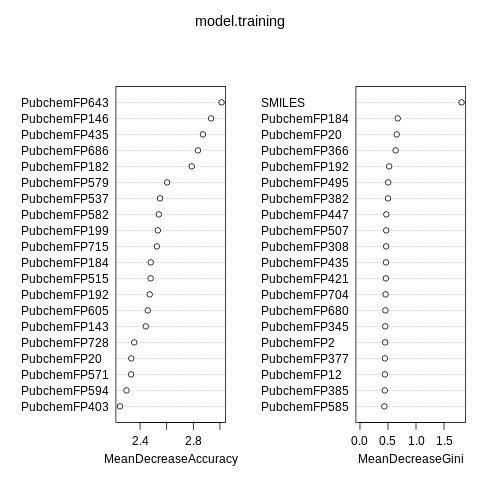

In [47]:
%%R
importance <- varImpPlot(model.training,sort=T, n.var=20)
importance

#Development of a tool to predict risk of an adverse drug event for treatment of a common disease has been completed. 